In [63]:
# Imports
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 1. Conexão com PostgreSQL

In [64]:
# Configuração da conexão
DB_CONFIG = {
    'dbname': 'movies_dw',
    'user': 'postgres',
    'password': 'postgres123',
    'host': 'localhost',
    'port': '5432'
}

print("🔌 Conectando ao PostgreSQL...")
conn = psycopg2.connect(**DB_CONFIG)
print("✅ Conexão estabelecida!\n")

# Verificar quantidade de registros
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM silver.movies_raw;")
count = cursor.fetchone()[0]
print(f"📊 Total de registros na camada SILVER: {count:,}")

🔌 Conectando ao PostgreSQL...
✅ Conexão estabelecida!

📊 Total de registros na camada SILVER: 45,433


## 2. Carregar Dados

In [65]:
# Carregar dados completos
query = "SELECT * FROM silver.movies_raw;"
df = pd.read_sql(query, conn)

print(f"✅ {len(df):,} filmes carregados")
print(f"📊 {df.shape[1]} colunas\n")
print("Colunas disponíveis:")
print(df.columns.tolist())

✅ 45,433 filmes carregados
📊 48 colunas

Colunas disponíveis:
['id', 'title', 'original_title', 'original_language', 'release_date', 'release_year', 'release_month', 'release_decade', 'budget', 'revenue', 'profit', 'roi', 'budget_category', 'revenue_category', 'runtime', 'runtime_category', 'vote_average', 'vote_count', 'popularity', 'genres_list', 'primary_genre', 'production_companies_list', 'primary_company', 'production_countries_list', 'primary_country', 'status', 'adult', 'overview', 'tagline', 'homepage', 'imdb_id', 'poster_path', 'director', 'lead_actor', 'top_actors', 'cast_size', 'crew_size', 'keywords_list', 'keywords_count', 'avg_rating', 'median_rating', 'std_rating', 'total_ratings', 'min_rating', 'max_rating', 'unique_users', 'tmdb_id', 'imdb_id_formatted']


## 3. Visão Geral dos Dados

In [66]:
# Primeiras linhas
df.head()

,id,title,original_title,original_language,release_date,release_year,release_month,release_decade,budget,revenue,profit,roi,budget_category,revenue_category,runtime,runtime_category,vote_average,vote_count,popularity,genres_list,primary_genre,production_companies_list,primary_company,production_countries_list,primary_country,status,adult,overview,tagline,homepage,imdb_id,poster_path,director,lead_actor,top_actors,cast_size,crew_size,keywords_list,keywords_count,avg_rating,median_rating,std_rating,total_ratings,min_rating,max_rating,unique_users,tmdb_id,imdb_id_formatted
0,862,Toy Story,Toy Story,en,1995-10-30,1995.0,10.0,1990.0,30000000,373554033.0,343554033.0,1145.18,Médio,Alta,81.0,Curto,7.7,5415.0,21.947,Animation|Comedy|Family,Animation,Pixar Animation Studios,Pixar Animation Studios,United States of America,United States of America,Released,False,"Led by Woody, Andy's toys live happily in his ...",None,http://toystory.disney.com/toy-story,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,John Lasseter,Tom Hanks,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13.0,106.0,jealousy|toy|boy|friendship|friends|rivalry|bo...,9.0,3.89,4.0,0.93,66008.0,0.5,5.0,66008.0,862,tt0114709
1,8844,Jumanji,Jumanji,en,1995-12-15,1995.0,12.0,1990.0,65000000,262797249.0,197797249.0,304.30,Alto,Alta,104.0,Médio,6.9,2413.0,17.016,Adventure|Fantasy|Family,Adventure,TriStar Pictures|Teitler Film|Interscope Commu...,TriStar Pictures,United States of America,United States of America,Released,False,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,None,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Joe Johnston,Robin Williams,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26.0,16.0,board game|disappearance|based on children's b...,6.0,3.24,3.0,0.96,26060.0,0.5,5.0,26060.0,8844,tt0113497
2,15602,Grumpier Old Men,Grumpier Old Men,en,1995-12-22,1995.0,12.0,1990.0,0,0.0,0.0,NaN,Micro,Muito Baixa,101.0,Médio,6.5,92.0,11.713,Romance|Comedy,Romance,Warner Bros.|Lancaster Gate,Warner Bros.,United States of America,United States of America,Released,False,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,None,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Howard Deutch,Walter Matthau,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7.0,4.0,fishing|best friend|duringcreditsstinger|old men,4.0,3.18,3.0,1.01,15497.0,0.5,5.0,15497.0,15602,tt0113228
3,31357,Waiting to Exhale,Waiting to Exhale,en,1995-12-22,1995.0,12.0,1990.0,16000000,81452156.0,65452156.0,409.08,Médio,Média,127.0,Longo,6.1,34.0,3.859,Comedy|Drama|Romance,Comedy,Twentieth Century Fox Film Corporation,Twentieth Century Fox Film Corporation,United States of America,United States of America,Released,False,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,None,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Forest Whitaker,Whitney Houston,Whitney Houston|Angela Bassett|Loretta Devine|...,10.0,10.0,based on novel|interracial relationship|single...,5.0,2.88,3.0,1.11,2981.0,0.5,5.0,2981.0,31357,tt0114885
4,11862,Father of the Bride Part II,Father of the Bride Part II,en,1995-02-10,1995.0,2.0,1990.0,0,76578911.0,76578911.0,NaN,Micro,Média,106.0,Médio,5.7,173.0,8.388,Comedy,Comedy,Sandollar Productions|Touchstone Pictures,Sandollar Productions,United States of America,United States of America,Released,False,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,None,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Charles Shyer,Steve Martin,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12.0,7.0,baby|midlife crisis|confidence|aging|daughter|...,9.0,3.08,3.0,0.99,15258.0,0.5,5.0,15258.0,11862,tt0113041


In [67]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45433 entries, 0 to 45432
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         45433 non-null  int64  
 1   title                      45430 non-null  object 
 2   original_title             45433 non-null  object 
 3   original_language          45422 non-null  object 
 4   release_date               45346 non-null  object 
 5   release_year               45346 non-null  float64
 6   release_month              45346 non-null  float64
 7   release_decade             45346 non-null  float64
 8   budget                     45433 non-null  int64  
 9   revenue                    45430 non-null  float64
 10  profit                     45430 non-null  float64
 11  roi                        8880 non-null   float64
 12  budget_category            45433 non-null  object 
 13  revenue_category           45430 non-null  obj

In [68]:
# Estatísticas descritivas
df.describe()

,id,release_year,release_month,release_decade,budget,revenue,profit,roi,runtime,vote_average,vote_count,popularity,cast_size,crew_size,keywords_count,avg_rating,median_rating,std_rating,total_ratings,min_rating,max_rating,unique_users,tmdb_id
count,45433.000000,45346.000000,45346.000000,45346.000000,4.543300e+04,4.543000e+04,4.543000e+04,8.880000e+03,45173.00000,45430.000000,45430.000000,45430.000000,45432.000000,45432.000000,45432.000000,44711.000000,44711.000000,37146.000000,44711.000000,44711.000000,44711.000000,44711.000000,45433.000000
mean,108375.226179,1991.882834,6.459225,1987.431747,4.224549e+06,1.121288e+07,6.988056e+06,3.371758e+05,94.12430,5.618329,109.935989,2.921209,12.371104,10.209456,3.446954,3.059886,3.120552,0.958541,581.078415,1.522220,4.176131,581.078415,108375.226179
std,112479.760366,24.053040,3.628039,24.239088,1.742799e+07,6.435213e+07,5.215724e+07,1.688256e+07,38.41554,1.924139,491.466335,6.006708,12.089791,15.804910,4.690083,0.730211,0.794478,0.399458,3050.164900,1.200804,1.030875,3050.164900,112479.760366
min,2.000000,1874.000000,1.000000,1870.000000,0.000000e+00,0.000000e+00,-1.657101e+08,-1.000000e+02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,0.500000,0.500000,1.000000,2.000000
25%,26461.000000,1978.000000,3.000000,1970.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,85.00000,5.000000,3.000000,0.386000,6.000000,2.000000,0.000000,2.690000,2.750000,0.760000,2.000000,0.500000,3.500000,2.000000,26461.000000
50%,59996.000000,2001.000000,7.000000,2000.000000,0.000000e+00,0.000000e+00,0.000000e+00,-5.093000e+01,95.00000,6.000000,10.000000,1.127000,10.000000,6.000000,2.000000,3.160000,3.000000,0.970000,8.000000,1.000000,4.500000,8.000000,59996.000000
75%,157351.000000,2010.000000,10.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.607650e+02,107.00000,6.800000,34.000000,3.678000,15.000000,12.000000,5.000000,3.500000,3.500000,1.140000,69.000000,2.500000,5.000000,69.000000,157351.000000
max,469172.000000,2020.000000,12.000000,2020.000000,3.800000e+08,2.787965e+09,2.550965e+09,1.239638e+09,1256.00000,10.000000,14075.000000,547.488000,313.000000,435.000000,149.000000,5.000000,5.000000,3.180000,91921.000000,5.000000,5.000000,91921.000000,469172.000000


## 4. Análise de Valores Nulos

In [69]:
# Contagem de NULLs por coluna
nulls = df.isnull().sum()
nulls_pct = (nulls / len(df) * 100).round(2)

null_analysis = pd.DataFrame({
    'Coluna': nulls.index,
    'Qtd_Nulos': nulls.values,
    'Pct_Nulos': nulls_pct.values
}).sort_values('Qtd_Nulos', ascending=False)

print("🔍 Top 10 colunas com mais valores nulos:\n")
print(null_analysis.head(10))

🔍 Top 10 colunas com mais valores nulos:

                       Coluna  Qtd_Nulos  Pct_Nulos
29                   homepage      37659      82.89
11                        roi      36553      80.45
28                    tagline      25032      55.10
37              keywords_list      14341      31.57
22            primary_company      11871      26.13
21  production_companies_list      11871      26.13
41                 std_rating       8287      18.24
23  production_countries_list       6282      13.83
24            primary_country       6282      13.83
20              primary_genre       2442       5.37


## 5. Análises Temporais

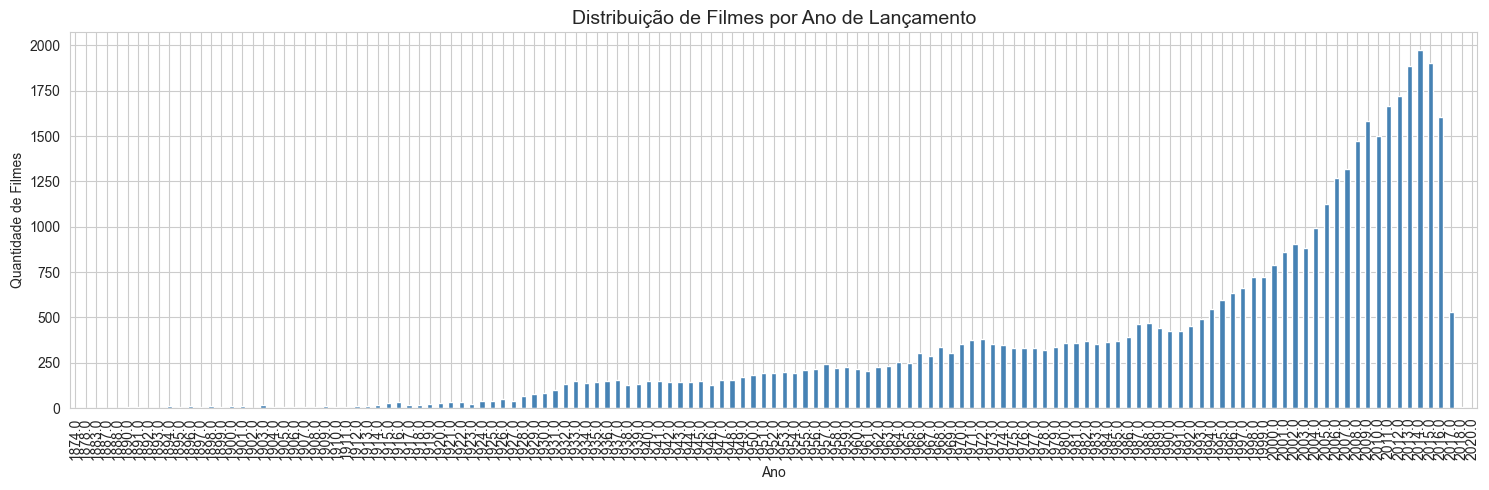


📊 Estatísticas por ano:
   Ano mais antigo: 1874
   Ano mais recente: 2020
   Ano com mais filmes: 2014 (1973 filmes)


In [70]:
# Distribuição de filmes por ano
filmes_por_ano = df.groupby('release_year').size().sort_index()

plt.figure(figsize=(15, 5))
filmes_por_ano.plot(kind='bar', color='steelblue')
plt.title('Distribuição de Filmes por Ano de Lançamento', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"\n📊 Estatísticas por ano:")
print(f"   Ano mais antigo: {df['release_year'].min():.0f}")
print(f"   Ano mais recente: {df['release_year'].max():.0f}")
print(f"   Ano com mais filmes: {filmes_por_ano.idxmax():.0f} ({filmes_por_ano.max()} filmes)")

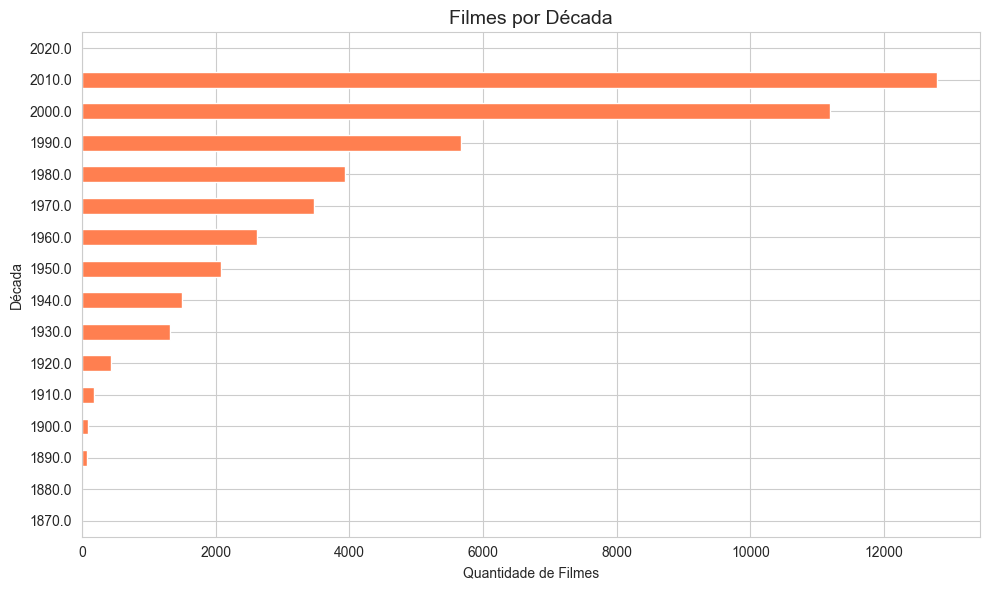

In [71]:
# Filmes por década
filmes_por_decada = df.groupby('release_decade').size().sort_index()

plt.figure(figsize=(10, 6))
filmes_por_decada.plot(kind='barh', color='coral')
plt.title('Filmes por Década', fontsize=14)
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Década')
plt.tight_layout()
plt.show()

## 6. Análises Financeiras

In [72]:
# Top 10 filmes por receita
top_revenue = df.nlargest(10, 'revenue')[['title', 'revenue', 'budget', 'profit', 'release_year']]
top_revenue['revenue_milhoes'] = (top_revenue['revenue'] / 1_000_000).round(2)
top_revenue['budget_milhoes'] = (top_revenue['budget'] / 1_000_000).round(2)

print("💰 Top 10 Filmes por Receita:\n")
print(top_revenue[['title', 'revenue_milhoes', 'budget_milhoes', 'release_year']])

💰 Top 10 Filmes por Receita:

                                              title  revenue_milhoes  \
14684                                        Avatar          2787.97   
26641                  Star Wars: The Force Awakens          2068.22   
1685                                        Titanic          1845.03   
17932                                  The Avengers          1519.56   
25180                                Jurassic World          1513.53   
28878                                     Furious 7          1506.25   
26644                       Avengers: Age of Ultron          1405.40   
17557  Harry Potter and the Deathly Hallows: Part 2          1342.00   
22206                                        Frozen          1274.22   
42208                          Beauty and the Beast          1262.89   

       budget_milhoes  release_year  
14684           237.0        2009.0  
26641           245.0        2015.0  
1685            200.0        1997.0  
17932           220.0    

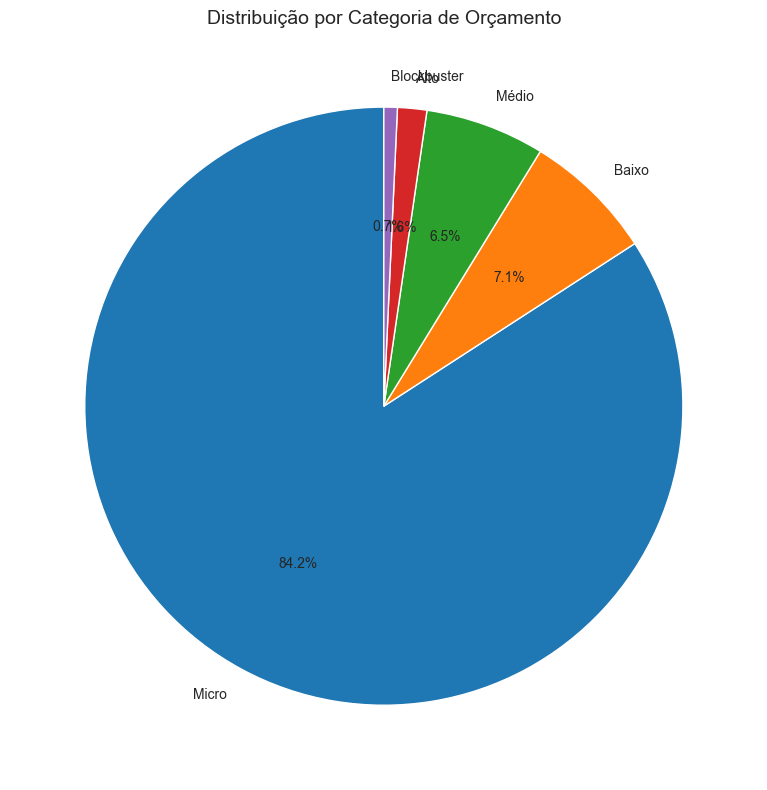


📊 Distribuição de Categorias de Orçamento:
budget_category
Micro          38232
Baixo           3218
Médio           2935
Alto             718
Blockbuster      330
Name: count, dtype: int64


In [73]:
# Distribuição de categorias de orçamento
budget_dist = df['budget_category'].value_counts()

plt.figure(figsize=(8, 8))
budget_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Categoria de Orçamento', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n📊 Distribuição de Categorias de Orçamento:")
print(budget_dist)

In [74]:
# Análise de ROI
df_roi = df[df['roi'].notna() & (df['roi'] > 0)].copy()

print(f"📊 Estatísticas de ROI:")
print(f"   Média: {df_roi['roi'].mean():.2f}%")
print(f"   Mediana: {df_roi['roi'].median():.2f}%")
print(f"   Máximo: {df_roi['roi'].max():.2f}%")
print(f"   Mínimo: {df_roi['roi'].min():.2f}%")

# Top 10 por ROI
top_roi = df.nlargest(10, 'roi')[['title', 'roi', 'budget', 'revenue', 'release_year']]
print("\n🚀 Top 10 Filmes por ROI:\n")
print(top_roi)

📊 Estatísticas de ROI:
   Média: 798124.69%
   Mediana: 210.49%
   Máximo: 1239638200.00%
   Mínimo: 0.07%



🚀 Top 10 Filmes por ROI:

                         title           roi  budget      revenue  \
4070            Less Than Zero  1.239638e+09       1   12396383.0   
3414              Modern Times  8.499999e+08       1    8500000.0   
14506    Welcome to Dongmakgol  4.197476e+08       8   33579813.0   
22373           Aquí Entre Nos  2.755583e+08       1    2755584.0   
2374   The Karate Kid, Part II  1.018618e+08     113  115103979.0   
26077                Nurse 3-D  9.999990e+07      10   10000000.0   
16788       From Prada to Nada  2.688072e+06      93    2500000.0   
14324      Paranormal Activity  1.288939e+06   15000  193355800.0   
8314                 Tarnation  5.329339e+05     218    1162014.0   
2672   The Blair Witch Project  4.132333e+05   60000  248000000.0   

       release_year  
4070         1987.0  
3414         1936.0  
14506        2005.0  
22373        2012.0  
2374         1986.0  
26077        2013.0  
16788        2011.0  
14324        2007.0  
8314         20

## 7. Análises por Gênero

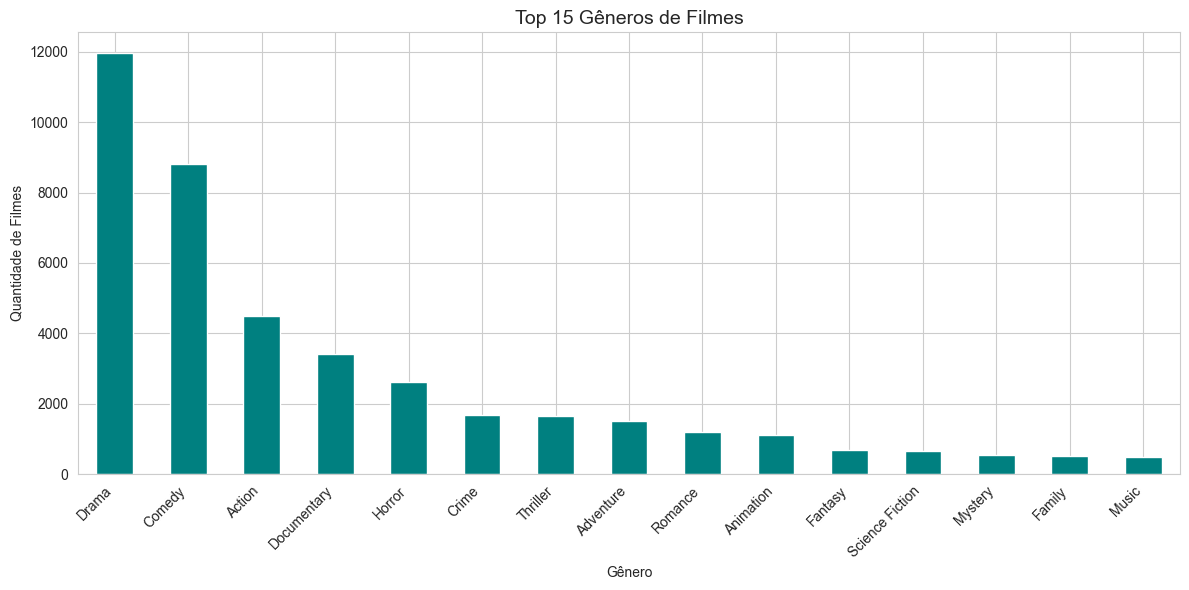


🎬 Top 10 Gêneros:

primary_genre
Drama          11953
Comedy          8816
Action          4487
Documentary     3413
Horror          2619
Crime           1684
Thriller        1663
Adventure       1509
Romance         1191
Animation       1124
Name: count, dtype: int64


In [75]:
# Top 15 gêneros
top_generos = df['primary_genre'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_generos.plot(kind='bar', color='teal')
plt.title('Top 15 Gêneros de Filmes', fontsize=14)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n🎬 Top 10 Gêneros:\n")
print(top_generos.head(10))

In [76]:
# Receita média por gênero (Top 10)
genero_stats = df.groupby('primary_genre').agg({
    'revenue': 'mean',
    'id': 'count'
}).rename(columns={'revenue': 'receita_media', 'id': 'qtd_filmes'})

genero_stats = genero_stats[genero_stats['qtd_filmes'] >= 50].sort_values('receita_media', ascending=False).head(10)
genero_stats['receita_media_milhoes'] = (genero_stats['receita_media'] / 1_000_000).round(2)

print("💰 Top 10 Gêneros por Receita Média (com ≥50 filmes):\n")
print(genero_stats[['receita_media_milhoes', 'qtd_filmes']])

💰 Top 10 Gêneros por Receita Média (com ≥50 filmes):

                 receita_media_milhoes  qtd_filmes
primary_genre                                     
Adventure                        55.75        1509
Animation                        31.93        1124
Fantasy                          27.73         703
Action                           27.21        4487
Science Fiction                  26.81         647
Family                           26.10         524
Thriller                          9.23        1663
Comedy                            8.60        8816
Romance                           8.07        1191
Crime                             8.06        1684


## 8. Análises de Avaliações

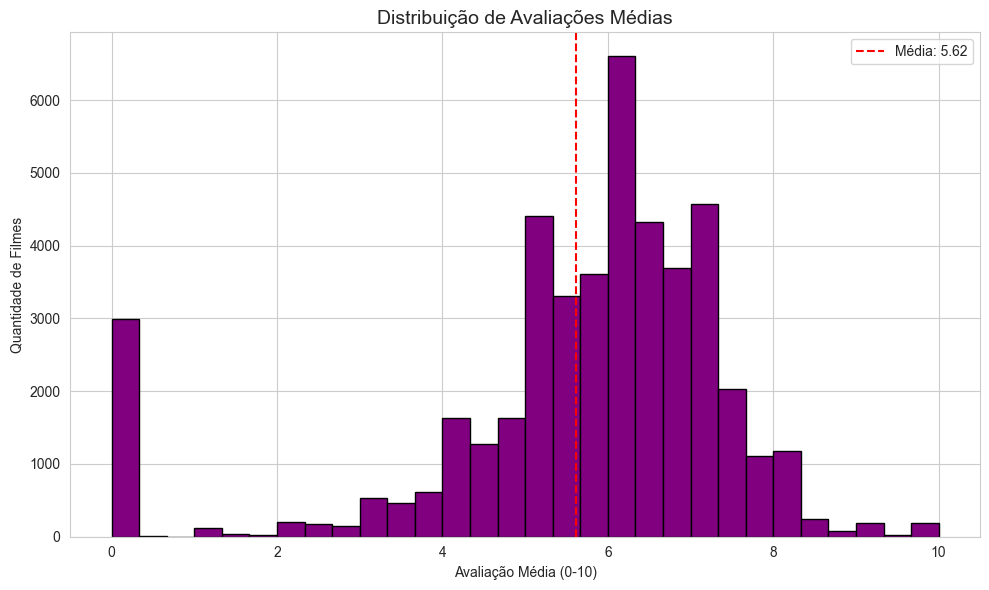


⭐ Estatísticas de Avaliação:
   Média: 5.62
   Mediana: 6.00
   Desvio Padrão: 1.92


In [77]:
# Distribuição de vote_average
plt.figure(figsize=(10, 6))
df['vote_average'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribuição de Avaliações Médias', fontsize=14)
plt.xlabel('Avaliação Média (0-10)')
plt.ylabel('Quantidade de Filmes')
plt.axvline(df['vote_average'].mean(), color='red', linestyle='--', label=f'Média: {df["vote_average"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n⭐ Estatísticas de Avaliação:")
print(f"   Média: {df['vote_average'].mean():.2f}")
print(f"   Mediana: {df['vote_average'].median():.2f}")
print(f"   Desvio Padrão: {df['vote_average'].std():.2f}")

In [78]:
# Top 10 filmes por avaliação (com mínimo de 100 votos)
top_rated = df[df['vote_count'] >= 100].nlargest(10, 'vote_average')[['title', 'vote_average', 'vote_count', 'release_year']]

print("🌟 Top 10 Filmes Mais Bem Avaliados (com ≥100 votos):\n")
print(top_rated)

🌟 Top 10 Filmes Mais Bem Avaliados (com ≥100 votos):

                                                  title  vote_average  \
10415                       Dilwale Dulhania Le Jayenge           9.1   
39086                                      Planet Earth           8.8   
326                            The Shawshank Redemption           8.5   
865                                       The Godfather           8.5   
40245                                        Your Name.           8.5   
13381  Dear Zachary: A Letter to a Son About His Father           8.4   
303                                        Pulp Fiction           8.3   
545                                    Schindler's List           8.3   
1191                    One Flew Over the Cuckoo's Nest           8.3   
1217                                             Psycho           8.3   

       vote_count  release_year  
10415       661.0        1995.0  
39086       176.0        2006.0  
326        8358.0        1994.0  
865   

## 9. Análises Geográficas

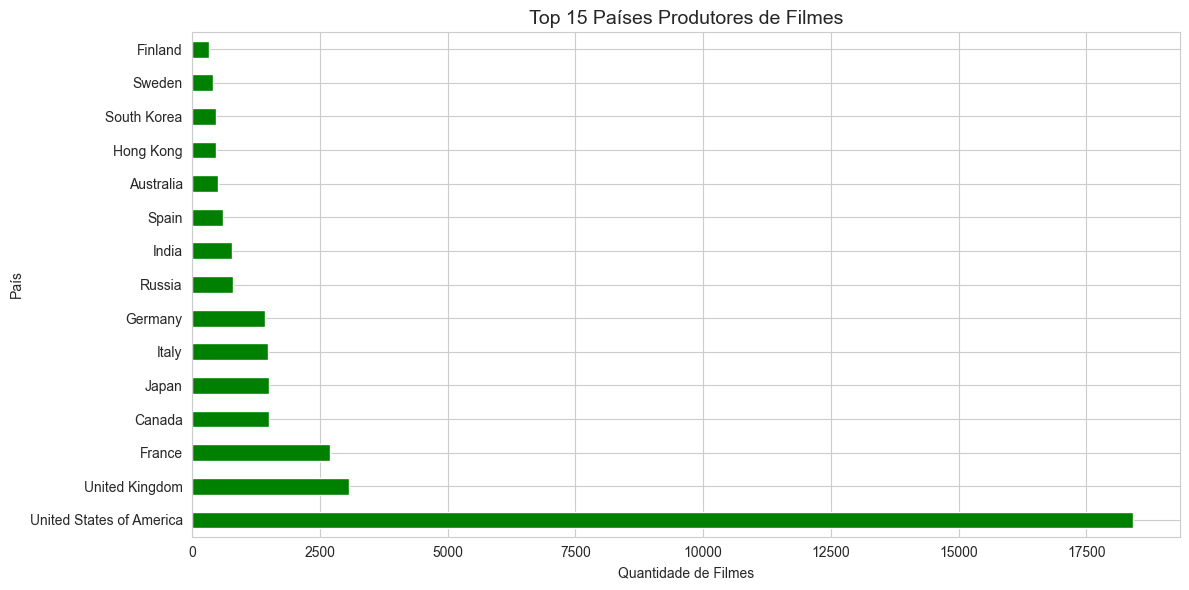


🌍 Top 10 Países Produtores:

primary_country
United States of America    18415
United Kingdom               3069
France                       2700
Canada                       1498
Japan                        1490
Italy                        1471
Germany                      1417
Russia                        800
India                         783
Spain                         601
Name: count, dtype: int64


In [79]:
# Top 15 países produtores
top_paises = df['primary_country'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_paises.plot(kind='barh', color='green')
plt.title('Top 15 Países Produtores de Filmes', fontsize=14)
plt.xlabel('Quantidade de Filmes')
plt.ylabel('País')
plt.tight_layout()
plt.show()

print("\n🌍 Top 10 Países Produtores:\n")
print(top_paises.head(10))

## 10. Análises de Talentos

In [80]:
# Top 10 diretores mais prolíficos
top_diretores = df['director'].value_counts().head(10)

print("🎬 Top 10 Diretores Mais Prolíficos:\n")
print(top_diretores)

# Top 10 atores principais
top_atores = df['lead_actor'].value_counts().head(10)

print("\n🎭 Top 10 Atores Principais:\n")
print(top_atores)

🎬 Top 10 Diretores Mais Prolíficos:

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      51
Woody Allen         49
Jean-Luc Godard     47
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: count, dtype: int64

🎭 Top 10 Atores Principais:

lead_actor
John Wayne          94
Jackie Chan         73
Nicolas Cage        60
Robert De Niro      56
Gérard Depardieu    52
Michael Caine       50
Paul Newman         47
Bruce Willis        47
Burt Lancaster      47
Barbara Stanwyck    45
Name: count, dtype: int64


## 11. Validação de Dados Transformados

In [81]:
# Verificar consistência de cálculos
print("🔍 Validação de Transformações:\n")

# Validar profit
df_valid = df[(df['budget'].notna()) & (df['revenue'].notna()) & (df['profit'].notna())]
profit_correto = (df_valid['profit'] == (df_valid['revenue'] - df_valid['budget'])).all()
print(f"   ✅ Cálculo de profit: {'OK' if profit_correto else 'ERRO'}")

# Validar ano extraído
df_date_valid = df[df['release_date'].notna()]
ano_correto = (pd.to_datetime(df_date_valid['release_date']).dt.year == df_date_valid['release_year']).all()
print(f"   ✅ Extração de ano: {'OK' if ano_correto else 'ERRO'}")

# Validar década
decada_correta = (df_date_valid['release_decade'] == (df_date_valid['release_year'] // 10) * 10).all()
print(f"   ✅ Cálculo de década: {'OK' if decada_correta else 'ERRO'}")

print("\n✅ Validações concluídas!")

🔍 Validação de Transformações:

   ✅ Cálculo de profit: OK
   ✅ Extração de ano: OK
   ✅ Cálculo de década: OK

✅ Validações concluídas!
   ✅ Extração de ano: OK
   ✅ Cálculo de década: OK

✅ Validações concluídas!


## 12. Resumo Final

In [82]:
print("="*80)
print("📊 RESUMO DA ANÁLISE - CAMADA SILVER")
print("="*80)
print(f"\n📌 Dados Gerais:")
print(f"   Total de Filmes: {len(df):,}")
print(f"   Total de Colunas: {df.shape[1]}")
print(f"   Período: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")

print(f"\n💰 Métricas Financeiras:")
print(f"   Receita Total: ${df['revenue'].sum() / 1_000_000_000:.2f}B")
print(f"   Orçamento Total: ${df['budget'].sum() / 1_000_000_000:.2f}B")
print(f"   Lucro Total: ${df['profit'].sum() / 1_000_000_000:.2f}B")

print(f"\n⭐ Avaliações:")
print(f"   Média Geral: {df['vote_average'].mean():.2f}/10")
print(f"   Total de Votos: {df['vote_count'].sum():,}")

print(f"\n🎬 Categorias:")
print(f"   Gêneros Únicos: {df['primary_genre'].nunique()}")
print(f"   Países Únicos: {df['primary_country'].nunique()}")
print(f"   Diretores Únicos: {df['director'].nunique()}")
print(f"   Atores Únicos: {df['lead_actor'].nunique()}")

print("\n" + "="*80)
print("✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*80)

📊 RESUMO DA ANÁLISE - CAMADA SILVER

📌 Dados Gerais:
   Total de Filmes: 45,433
   Total de Colunas: 48
   Período: 1874 - 2020

💰 Métricas Financeiras:
   Receita Total: $509.40B
   Orçamento Total: $191.93B
   Lucro Total: $317.47B

⭐ Avaliações:
   Média Geral: 5.62/10
   Total de Votos: 4,994,392.0

🎬 Categorias:
   Gêneros Únicos: 20
   Países Únicos: 143
   Diretores Únicos: 17571
   Atores Únicos: 18373

✅ ANÁLISE CONCLUÍDA COM SUCESSO!


In [83]:
# Fechar conexão
cursor.close()
conn.close()
print("\n🔌 Conexão com PostgreSQL encerrada.")


🔌 Conexão com PostgreSQL encerrada.
